In [244]:
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import math
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D


from sklearn.model_selection import train_test_split

%matplotlib inline

## Neural networks

### Ex. 1 - Plot data

In [448]:
# read in dataset from the course
df = scipy.io.loadmat('/Users/dorotamierzwa/Data Science/Machine Learning - Coursera/machine-learning-ex3/ex3/ex3data1.mat')

In [452]:
df['X'].shape

(5000, 400)

In [450]:
df['X']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

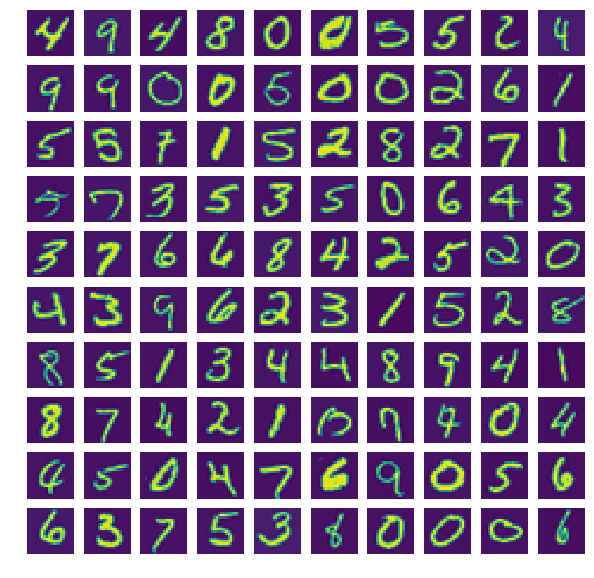

In [249]:
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axes[i,j].imshow(np.reshape(df['X'][np.random.randint(0,5000,1)],(20,20)).T)
        axes[i,j].set_axis_off()

### Ex. 2 Vectorize Logistic Regression

In [453]:
X = df['X']
y = df['y']

In [250]:
def sigmoid(z):
    g = np.zeros(len(np.array([z])))
    g = 1 / (1 + math.e**(-z))
    return g

In [302]:
# create test variables as in the course example
X_t = np.hstack((np.ones((5,1)), (np.resize(np.arange(1,16,1), (3,5))/10).T))
theta_t = np.vstack((np.array((-2,-1,1,2))))
y_t = np.vstack((np.array((1,0,1,0,1))))

In [376]:
y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [392]:
def costFunctionReg(theta, X, y, lmbda):
    m=len(y)
    h_theta = sigmoid(np.dot(X, theta))
    log_h = np.log(h_theta)
    log_h_1 = np.log(1 - h_theta)
    res = np.sum(-y *log_h - (1 - y) * log_h_1)
    J = 1/m * res
    shift_theta = np.vstack((0, theta[1:]))
    reg_J= J + lmbda/(2*m) * sum(shift_theta**2)
    grad_temp = 1/m * np.dot(X.T, (h_theta - y))
    grad = grad_temp + (lmbda/m) * shift_theta
    return reg_J[0], grad

In [393]:
J, grad = costFunctionReg(theta_t, X_t, y_t, 3)

In [394]:
J

2.534819396109744

In [397]:
grad

array([[ 0.14656137],
       [-0.54855841],
       [ 0.72472227],
       [ 1.39800296]])

### Ex.3 One vs. all classification

In [405]:
def gradientDescentReg(X,y,theta,alpha,num_iters, lmbda):
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunctionReg(theta,X,y, lmbda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta, J_history

In [424]:
def oneVsAll(X, y, num_labels, lmbda):
    m = X.shape[0]
    n = X.shape[1]
    all_theta = []
    all_J = []
    X = np.hstack((np.ones((m,1)), X))
    initial_theta = np.zeros((n+1,1))
    for i in range(1, num_labels+1):
        theta, J = gradientDescentReg(X, np.where(y == i, 1, 0),initial_theta, 1, 300, lmbda)
        all_theta.extend(theta)
        all_J.extend(J)
    return np.array(all_theta).reshape(num_labels,n+1), all_J

In [425]:
theta, all_J = oneVsAll(X, y, 10, 0.1)

### Ex. 4 Predict

In [436]:
def predictOneVsAll(X, theta):
    m= X.shape[0]
    X = np.hstack((np.ones((m,1)), X))
    pred = sigmoid(np.dot(X, theta.T))
    return np.argmax(pred, axis=1) + 1

In [437]:
pred = predictOneVsAll(X, theta)

In [439]:
pred.shape

(5000,)

In [440]:
print("Training Set Accuracy:",sum(pred[:,np.newaxis]==y)[0]/5000*100,"%")

Training Set Accuracy: 91.47999999999999 %


### Ex. 5 Neural Networks

In [502]:
# read in dataset from the course
df2 = scipy.io.loadmat('/Users/dorotamierzwa/Data Science/Machine Learning - Coursera/machine-learning-ex3/ex3/ex3weights.mat')

In [503]:
df2['Theta1'].shape

(25, 401)

In [504]:
df2['Theta2'].shape

(10, 26)

In [510]:
def predict(X, theta1, theta2):
    m = X.shape[0]
    X = np.hstack((np.ones((m, 1)), X))
    a1 = sigmoid(np.dot(X, theta1.T))
    a1 = np.hstack((np.ones((m, 1)), a1))
    a2 = sigmoid(np.dot(a1, theta2.T))
    return np.argmax(a2, axis=1)+1

In [511]:
p = predict(X, df2['Theta1'], df2['Theta2'])

In [512]:
p

array([10, 10, 10, ...,  9,  9,  9])

In [513]:
print("Training Set Accuracy:",sum(p[:,np.newaxis]==y)[0]/5000*100,"%")

Training Set Accuracy: 97.52 %
